In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import sparse
%matplotlib inline
plt.style.use('ggplot')

In [4]:
red_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
                       sep = ';')
white_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                        sep = ';')      

In [5]:
red = red_data.values
white = white_data.values
X = np.vstack((red, white))
y = np.zeros((red.shape[0], 1))
y = np.vstack((y, np.ones((white.shape[0], 1))))

print(red.shape, white.shape, X.shape, y.shape)

(1599, 12) (4898, 12) (6497, 12) (6497, 1)


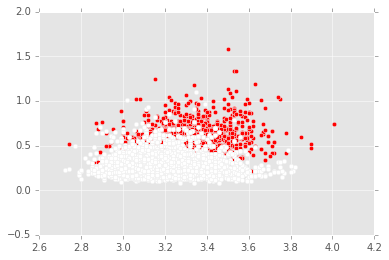

In [6]:
plt.scatter(red[:,8], red[:,1], c = 'red')
plt.scatter(white[:,8], white[:,1], c = 'white')

# E-step

X: input data

pi_ks: previous step's $\pi_{k}$ in column vector

theta_ks: previous step's $\vec{\theta}_k$ in array

prob_func: takes a row of theta_k and calculates $p(\vec{x}_i | \vec{\theta}_k




Returns: $r_{ik}$ in a matrix

In [7]:
def E_step(X, pi_ks, theta_ks, prob_func):
    r_iks = np.zeros((X.shape[0], pi_ks.shape[0]))
    
    norm_term = 0
    for i in range(X.shape[0]):
        for j in range(pi_ks.shape[0]):
            norm_term += prob_func(X[i], theta_ks[k])
    
    for i in range(X.shape[0]):
        for j in range(pi_ks.shape[0]):
            numerator = pi_ks[k] * prob_func(X[i], theta_ks[k])
            denom = norm_term - numerator
            r_iks[i,j] = numerator / denom
            
    return r_iks

# M-step

X:input data

r_iks: $r_{ik}$  in a matrix

S_0: Covariance regularization matrix

nu_0: how strongly we believe the prior

k_0: regularization of $\mu_k$, default to $0$

In [17]:
def M_step(x, r_iks, S_0, nu_0, k_0 = 0):
    r_ks = np.sum(r_iks, axis = 1)
    x_bar_ks = np.zeros((r_iks.shape[0], X.shape[1]))
    for k in range(r_iks.shape[0]):
        x_bar_ks = (X.T @ r_iks[:,k]) / r_ks[k]
    
    

In [21]:
a = np.array([4,5,6])
a.T
np.eye(3) @ a.T


array([ 4.,  5.,  6.])